# AutoscoutDataAnalysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_clean = pd.read_csv("cleaned_cars.csv")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15426 entries, 0 to 15425
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 15426 non-null  object 
 1   brand               15426 non-null  object 
 2   model               15426 non-null  object 
 3   price               15424 non-null  float64
 4   first_registration  15426 non-null  object 
 5   mileage             15426 non-null  object 
 6   fuel_type           15426 non-null  object 
 7   color               15426 non-null  object 
 8   gearbox             15426 non-null  object 
 9   power               15188 non-null  float64
 10  engine_size         14581 non-null  float64
 11  seller              15426 non-null  object 
 12  location            15426 non-null  object 
 13  body_type           15426 non-null  object 
 14  doors               15426 non-null  object 
 15  seats               15426 non-null  object 
 16  driv

### First cleaned data analysis

The folowing help to add visualise the actual cleandata and do some corection on the data cleaning notebook

In [3]:
    """_summary_
    
    Improvement found : 
    
    # To improve the nulls on the date, we''re giving a cutoff date : 1900-01-01
    df_clean['first_registration'] = pd.to_datetime(df_clean['first_registration'])
    df_clean['first_registration'] = df_clean['first_registration'].fillna(pd.Timestamp('1900-01-01'))
    
    
    df['price'] = pd.to_numeric(df['price'], errors='coerce') # Clean the unknown in the price column with NaN (Wich pandas recognize)
    
    """

"_summary_\n\nImprovement found : \n\n# To improve the nulls on the date, we''re giving a cutoff date : 1900-01-01\ndf_clean['first_registration'] = pd.to_datetime(df_clean['first_registration'])\ndf_clean['first_registration'] = df_clean['first_registration'].fillna(pd.Timestamp('1900-01-01'))\n\n\ndf['price'] = pd.to_numeric(df['price'], errors='coerce') # Clean the unknown in the price column with NaN (Wich pandas recognize)\n\n"

In [4]:
df_clean.head()

,url,brand,model,price,first_registration,mileage,fuel_type,color,gearbox,power,...,body_type,doors,seats,drivetrain,co2_emission,emission_class,condition,upholstery,upholstery_color,country
0,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,5500.0,2011-01-01,233685,diesel,red,manual,100.0,...,sedan,4,5,front,unknown,134 g/km (comb.),used,grey,others,IT
1,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,159,13990.0,2010-01-01,134000,gasoline,red,manual,147.0,...,sedan,4,5,front,unknown,unknown,used,unknown,unknown,ES
2,https://www.autoscout24.com/offers/renault-oth...,renault,unknown,2300.0,1963-01-01,27000,gasoline,yellow,manual,59.0,...,sedan,unknown,unknown,unknown,unknown,unknown,used,unknown,alcantara,BE
3,https://www.autoscout24.com/offers/opel-antara...,opel,antara,3499.0,2008-01-01,212575,gasoline,black,manual,103.0,...,off-road/pick-up,5,5,4wd,unknown,229 g/km (comb.),used,unknown,metallic,NL
4,https://www.autoscout24.com/offers/alfa-romeo-...,alfa romeo,giulia,39800.0,2023-01-01,7100,gasoline,white,automatic,206.0,...,sedan,4,4,front,Euro 6d,unknown,employee's car,full leather,black,DE


In [5]:
# Lets analyze the features caractéristics with describe :
df_clean.describe()

,price,power,engine_size
count,1.542400e+04,15188.000000,14581.000000
mean,8.716821e+04,187.520016,81.905768
std,8.615921e+05,137.935629,267.568536
min,1.000000e+00,1.000000,0.000000
25%,1.499900e+04,90.000000,1.000000
50%,2.499000e+04,132.000000,1.000000
75%,4.690000e+04,239.000000,3.000000
max,1.000000e+08,883.000000,999.000000


In [6]:
# On regarde le nombre de valeurs uniques dans chaque column du dataset
for column in df_clean.columns:
    print(f"{column}: {df_clean[column].nunique()} unique values")
    

url: 15426 unique values
brand: 42 unique values
model: 888 unique values
price: 4493 unique values
first_registration: 90 unique values
mileage: 8738 unique values
fuel_type: 11 unique values
color: 285 unique values
gearbox: 79 unique values
power: 498 unique values
engine_size: 38 unique values
seller: 3 unique values
location: 3134 unique values
body_type: 10 unique values
doors: 1407 unique values
seats: 224 unique values
drivetrain: 144 unique values
co2_emission: 422 unique values
emission_class: 584 unique values
condition: 7 unique values
upholstery: 17 unique values
upholstery_color: 19 unique values
country: 9 unique values


In [7]:
# Analyze the missing data (so the : Nones, NaNsn, )
print("\nMissing data in each column:")
print(df_clean.isnull().sum())


Missing data in each column:
url                     0
brand                   0
model                   0
price                   2
first_registration      0
mileage                 0
fuel_type               0
color                   0
gearbox                 0
power                 238
engine_size           845
seller                  0
location                0
body_type               0
doors                   0
seats                   0
drivetrain              0
co2_emission            0
emission_class          0
condition               0
upholstery              0
upholstery_color        0
country                 0
dtype: int64


## Analyse des résultats


Statistique descriptive : analyse des trends 
            (prix par pays, 
            par marque, 
            par carrosserie, 
            par type de carburant, 
            par année, 
            par nombre de kilomètres)    




In [8]:
df_analyse = df_clean
df_analyse.dropna(subset=['price'], inplace=True) # drop the NaN in the prices
df_analyse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15424 entries, 0 to 15425
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 15424 non-null  object 
 1   brand               15424 non-null  object 
 2   model               15424 non-null  object 
 3   price               15424 non-null  float64
 4   first_registration  15424 non-null  object 
 5   mileage             15424 non-null  object 
 6   fuel_type           15424 non-null  object 
 7   color               15424 non-null  object 
 8   gearbox             15424 non-null  object 
 9   power               15188 non-null  float64
 10  engine_size         14581 non-null  float64
 11  seller              15424 non-null  object 
 12  location            15424 non-null  object 
 13  body_type           15424 non-null  object 
 14  doors               15424 non-null  object 
 15  seats               15424 non-null  object 
 16  drivetrai

### Analyse Price by country

In [9]:
countrys = df_analyse['country'].unique()
print(countrys)

['IT' 'ES' 'BE' 'NL' 'DE' 'AT' 'FR' 'LU']


In [10]:
# Some random statistique about each country
for country in countrys:
    
    country_data = df_analyse[df_analyse['country'] == country]

    mean = country_data['price'].mean()
    median = country_data['price'].median()
    min = country_data['price'].min()
    max = country_data['price'].max()
    
    print(f"Some stats in {country}:")
    print(f"  The mean price is {mean:.2f} Euros")
    print(f"  The median price for a car is: {median:.2f} Euros")
    print(f"  The minimum price: {min:.2f} Euros")
    print(f"  And the maximum price: {max:.2f} Euros")

Some stats in IT:
  The mean price is 40943.41 Euros
  The median price for a car is: 18500.00 Euros
  The minimum price: 500.00 Euros
  And the maximum price: 2450000.00 Euros
Some stats in ES:
  The mean price is 139130.55 Euros
  The median price for a car is: 26900.00 Euros
  The minimum price: 1590.00 Euros
  And the maximum price: 9000000.00 Euros
Some stats in BE:
  The mean price is 52402.29 Euros
  The median price for a car is: 23900.00 Euros
  The minimum price: 1200.00 Euros
  And the maximum price: 9999999.00 Euros
Some stats in NL:
  The mean price is 50485.80 Euros
  The median price for a car is: 14950.00 Euros
  The minimum price: 599.00 Euros
  And the maximum price: 3999950.00 Euros
Some stats in DE:
  The mean price is 98615.95 Euros
  The median price for a car is: 27999.00 Euros
  The minimum price: 1.00 Euros
  And the maximum price: 99999999.00 Euros
Some stats in AT:
  The mean price is 105695.18 Euros
  The median price for a car is: 33990.00 Euros
  The minim

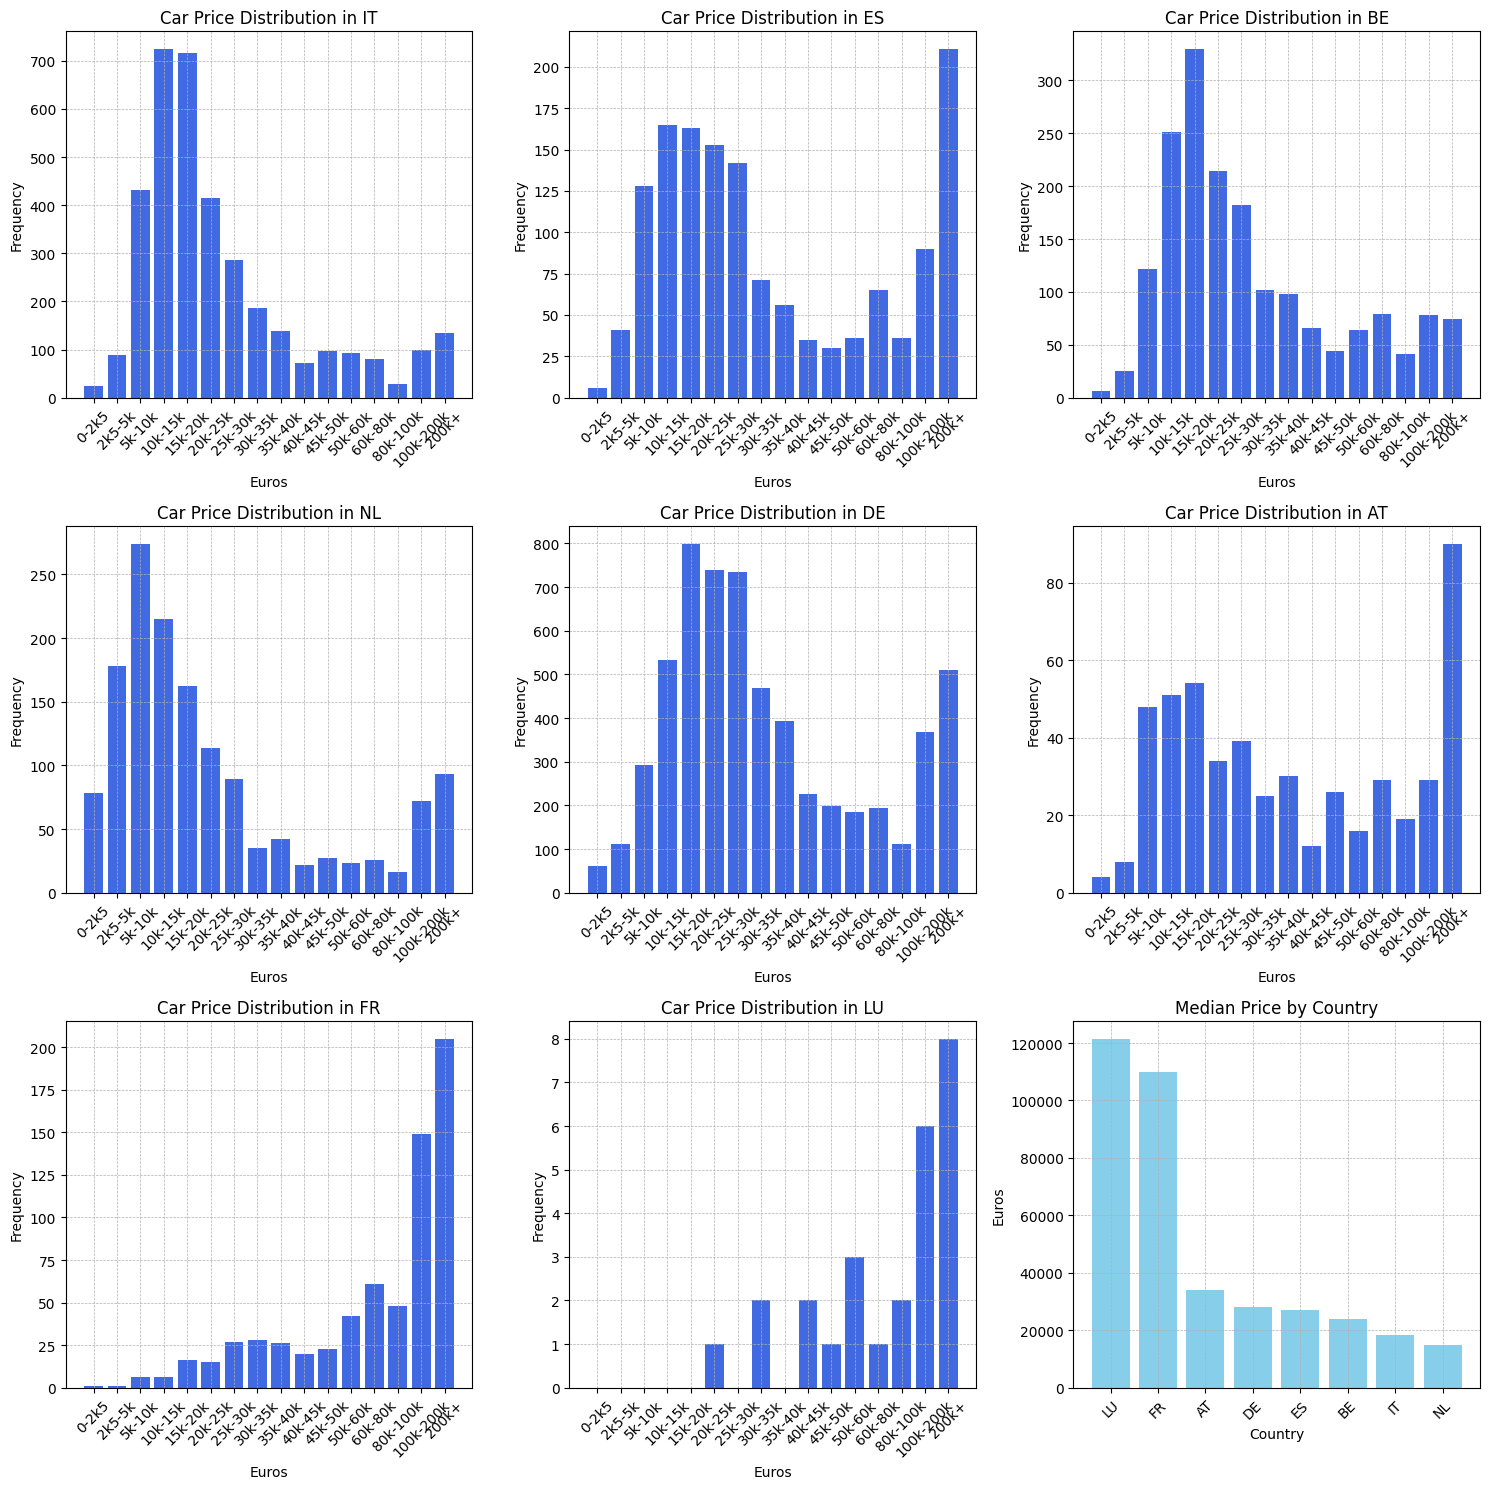

In [12]:
# Setting the bins and labels
bins = [0, 2500, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000, 80000, 100000, 200000, np.inf]
labels = ['0-2k5', '2k5-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k', '40k-45k', '45k-50k', '50k-60k', '60k-80k', '80k-100k', '100k-200k', '200k+']

# Function to avoid the " setting with copy " warning from pd
def price_cat(df, country):
    indice = df['country'] == country
    df.loc[indice, 'price_bin'] = pd.cut(df.loc[indice, 'price'], bins=bins, labels=labels)
    return df.loc[indice, 'price_bin']

# val initialisating
nCountry = len(countrys)
cols = 3
rows = (nCountry + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for index, country in enumerate(countrys):
    ax = axes[index]
    
    df_analyse['price_bin'] = price_cat(df_analyse, country)
    price_counts = df_analyse[df_analyse['country'] == country]['price_bin'].value_counts().sort_index()

    # Plot the bars of the price for one country
    ax.bar(price_counts.index, price_counts.values, color='royalblue')
    ax.set_title(f'Car Price Distribution in {country}')
    ax.set_xlabel('Euros')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot the median price by country
med_prices = df_analyse.groupby('country')['price'].median().sort_values(ascending=False) #The median is more reprenentative for me
ax = axes[nCountry]  
ax.bar(med_prices.index, med_prices.values, color='skyblue')
ax.set_title('Median Price by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Euros')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, linestyle='--', linewidth=0.5)

# Adjustments for the plot
plt.tight_layout()
plt.show()

#drop the added column : 
df_analyse.drop('price_bin', axis=1, inplace=True)


In [13]:
"""
### Get the plot one by one

avg_prices = df_analyse.groupby('country')['price'].median().sort_values(ascending=False)
# Plot
plt.figure(figsize=(10, 8))  
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Car Prices by Country')
plt.xlabel('Countrys')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

#count = 0
for country in countrys:
    plt.figure(figsize=(10, 6))
    country_data = df_analyse[df_analyse['country'] == country]

    country_data['price_bin'] = pd.cut(country_data['price'], bins=bins, labels=labels)
    price_counts = country_data['price_bin'].value_counts().sort_index()
    #count += price_counts.sum()
    
    plt.bar(price_counts.index, price_counts.values, color='royalblue')
    plt.title(f'Car Price Distribution in {country}')
    plt.xlabel('Euros')
    plt.ylabel('Freq')
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
#print(count)
"""

"\n### Get the plot one by one\n\navg_prices = df_analyse.groupby('country')['price'].median().sort_values(ascending=False)\n# Plot\nplt.figure(figsize=(10, 8))  \navg_prices.plot(kind='bar', color='skyblue')\nplt.title('Average Car Prices by Country')\nplt.xlabel('Countrys')\nplt.ylabel('Euros')\nplt.xticks(rotation=45)  \nplt.tight_layout()  \nplt.show()\n\n#count = 0\nfor country in countrys:\n    plt.figure(figsize=(10, 6))\n    country_data = df_analyse[df_analyse['country'] == country]\n\n    country_data['price_bin'] = pd.cut(country_data['price'], bins=bins, labels=labels)\n    price_counts = country_data['price_bin'].value_counts().sort_index()\n    #count += price_counts.sum()\n    \n    plt.bar(price_counts.index, price_counts.values, color='royalblue')\n    plt.title(f'Car Price Distribution in {country}')\n    plt.xlabel('Euros')\n    plt.ylabel('Freq')\n    plt.xticks(rotation=45)\n    plt.grid(True, which='both', linestyle='--', linewidth=0.5)\n    plt.tight_layout()\n  

### Analyse Price by brand

In [14]:
brands = df_analyse['brand'].unique()
print("There are ", brands.size, " brands")
print(brands)

There are  41  brands
['alfa romeo' 'renault' 'opel' 'bugatti' 'chevrolet' 'cadillac' 'citroen'
 'audi' 'ferrari' 'cupra' 'aston martin' 'dacia' 'corvette' 'bentley'
 'volkswagen' 'ford' 'bmw' 'honda' 'jeep' 'land rover' 'mazda'
 'mitsubishi' 'nissan' 'porsche' 'mclaren' 'hyundai' 'maserati' 'mini'
 'peugeot' 'rolls-royce' 'lexus' 'lamborghini' 'kia' 'jaguar' 'skoda'
 'smart' 'subaru' 'suzuki' 'seat' 'toyota' 'tesla']


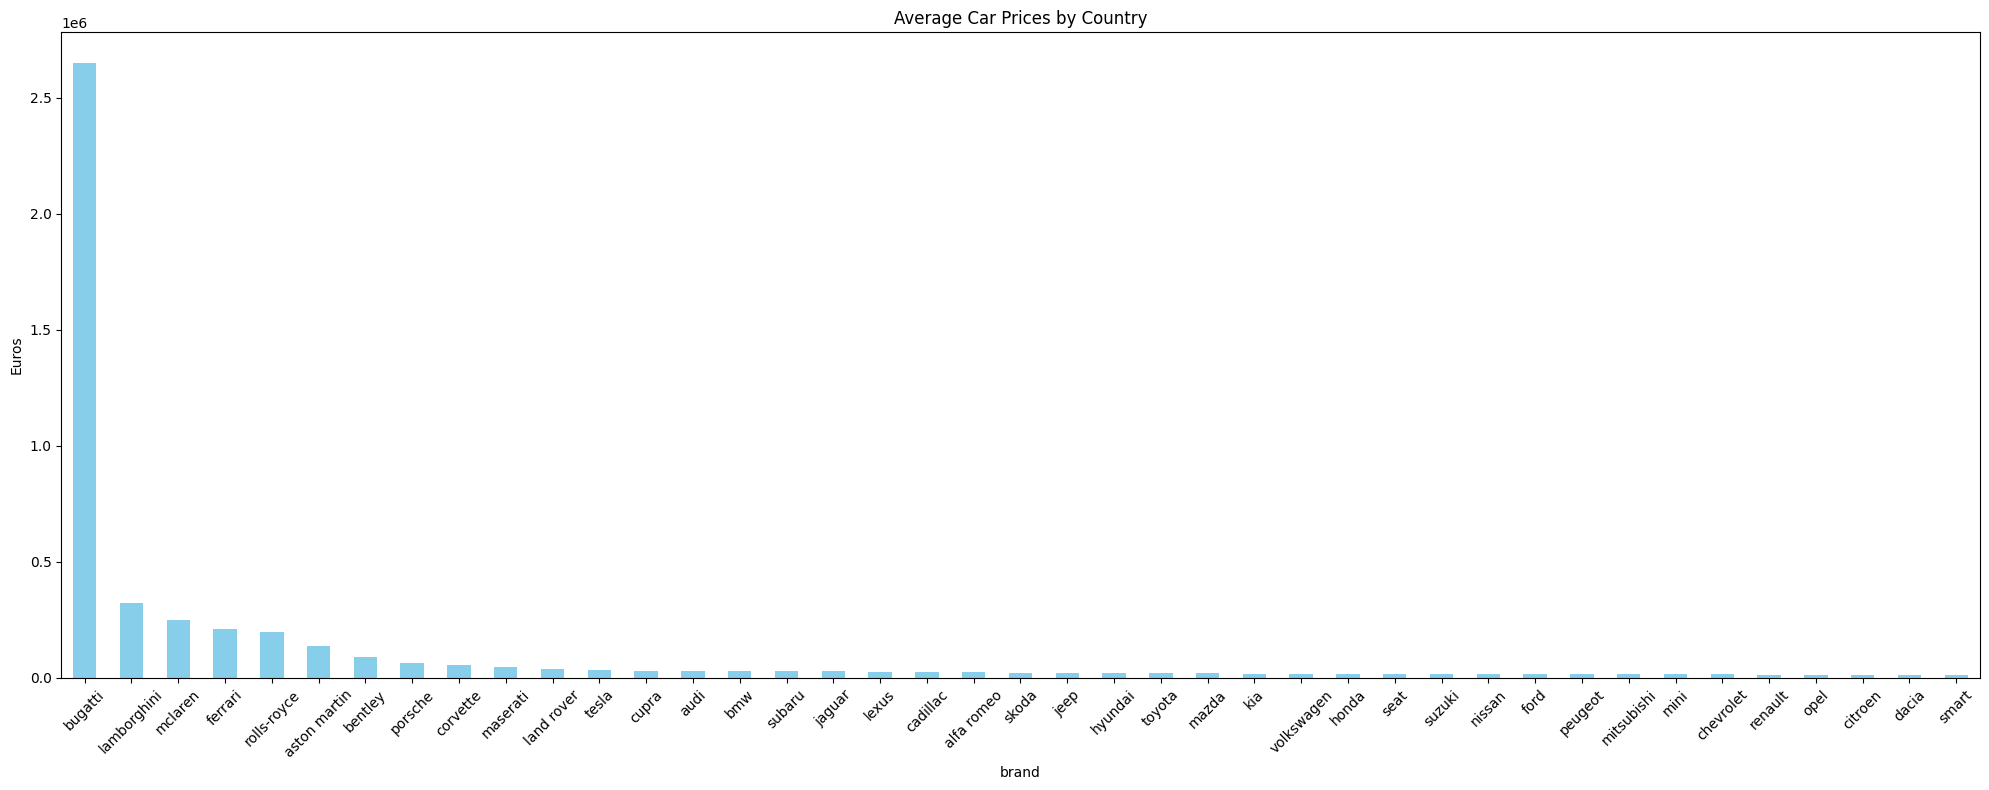

In [15]:
# Car analysis
med_prices = df_analyse.groupby('brand')['price'].median().sort_values(ascending=False)
# Plot
plt.figure(figsize=(20, 8))  
med_prices.plot(kind='bar', color='skyblue')
plt.title('Average Car Prices by Country')
plt.xlabel('brand')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


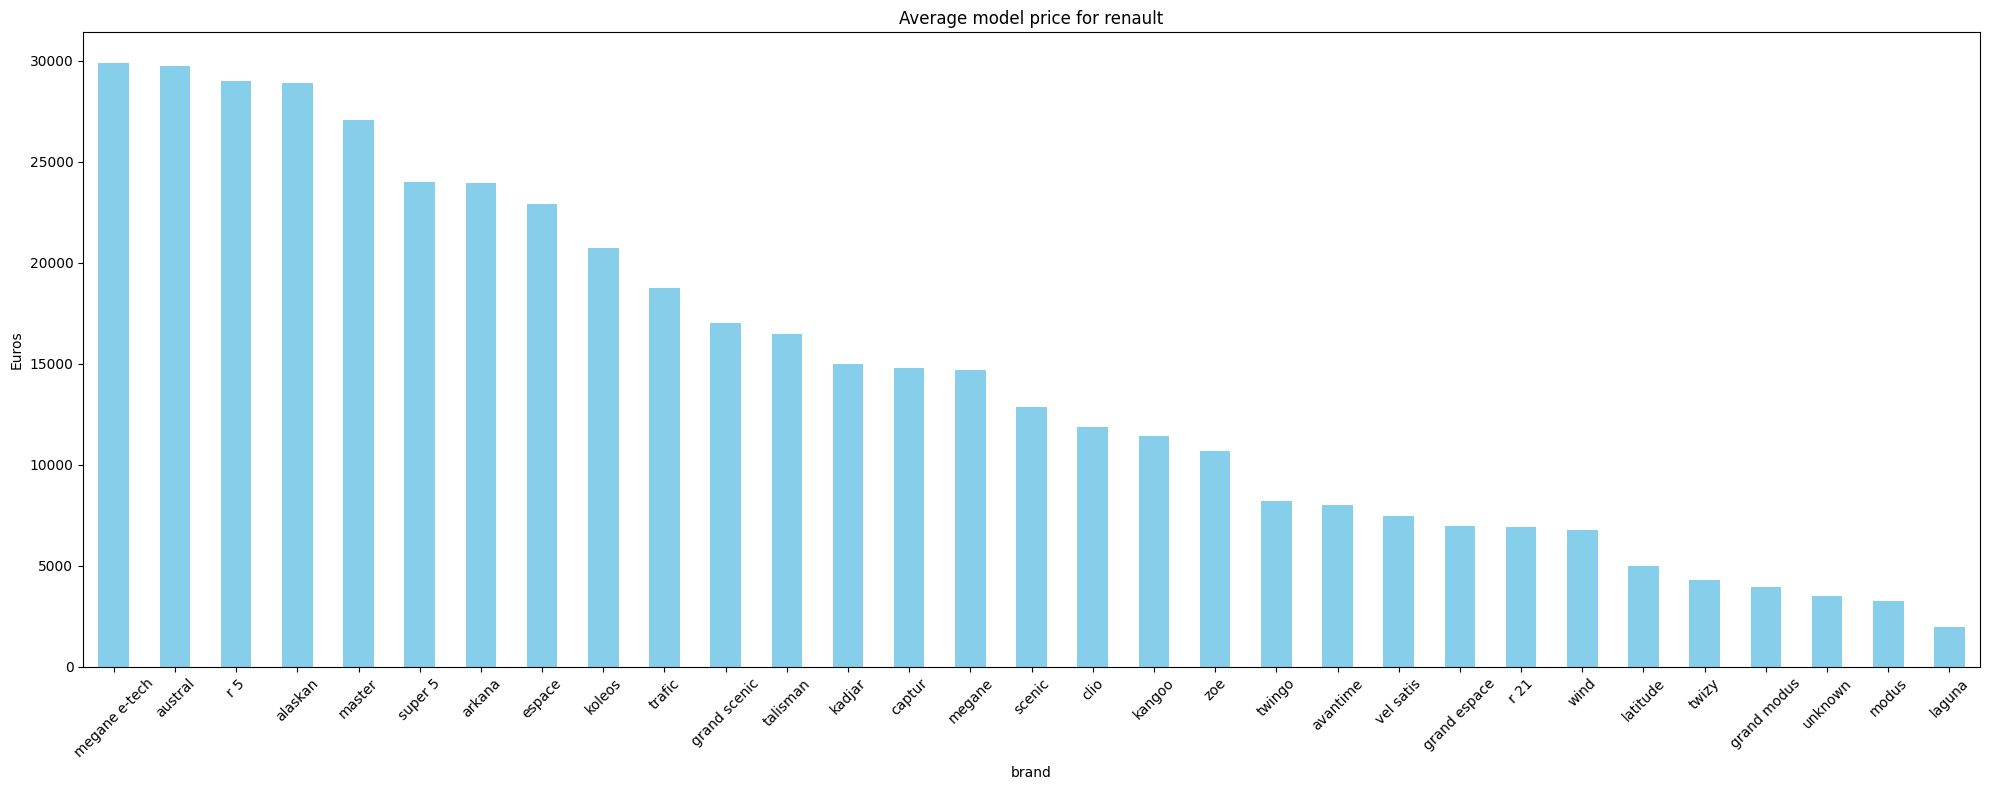

In [16]:
"""brands :
['alfa romeo' 'renault' 'opel' 'bugatti' 'chevrolet' 'cadillac' 'citroen'
 'audi' 'ferrari' 'cupra' 'aston martin' 'dacia' 'corvette' 'bentley'
 'volkswagen' 'ford' 'bmw' 'honda' 'jeep' 'land rover' 'mazda'
 'mitsubishi' 'nissan' 'porsche' 'mclaren' 'hyundai' 'maserati' 'mini'
 'peugeot' 'rolls-royce' 'lexus' 'lamborghini' 'kia' 'jaguar' 'skoda'
 'smart' 'subaru' 'suzuki' 'seat' 'toyota' 'tesla']
"""
# Choose the brand to analyze
brand = 'renault'

brand_data = df_analyse[df_analyse['brand'] == brand]
model_in_brand_med_price = brand_data.groupby('model')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(20, 8))  
model_in_brand_med_price.plot(kind='bar', color='skyblue')
plt.title(f'Average model price for {brand}')
plt.xlabel('brand')
plt.ylabel('Euros')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()
    

### Analyse Price by year

In [74]:
df_year = df_analyse
df_year['first_registration'] = pd.to_datetime(df_year['first_registration'], errors='coerce')  

C:\Users\Damian\AppData\Local\Temp\ipykernel_44924\2583825960.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['decade'] = (df_year['year'] // 10) * 10


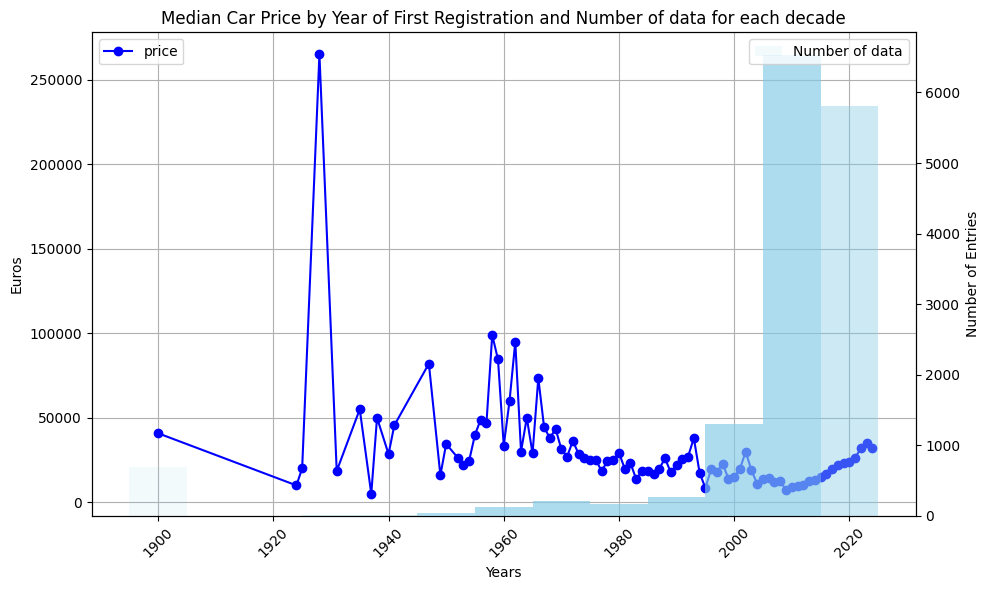

In [75]:
#only get the year
df_year['year'] = df_year['first_registration'].dt.year

# We use a threshold to avoid one huge value
price_max = 500000  
df_year = df_year[df_year['price'] <= price_max]

# get the median price by year
med_price_year = df_year.groupby('year')['price'].median()

# get the decade
df_year['decade'] = (df_year['year'] // 10) * 10

# Plots
plt.figure(figsize=(10, 6))

#plot line
ax1 = plt.gca()
med_price_year.plot(marker='o', linestyle='-', color='b')  # Line plot with markers
ax1.set_title('Median Car Price by Year of First Registration and Number of data for each decade')
ax1.set_xlabel('Years')
ax1.set_ylabel('Euros')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot histo
ax2 = ax1.twinx()  
decade_ticks = med_price_year.index // 10 * 10  
decade_counts = df_year['decade'].value_counts().reindex(decade_ticks, fill_value=0)  
ax2.bar(decade_counts.index, decade_counts.values, width=10, alpha=0.1, color='skyblue', label='Number of data')
ax2.set_ylabel('Number of Entries')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


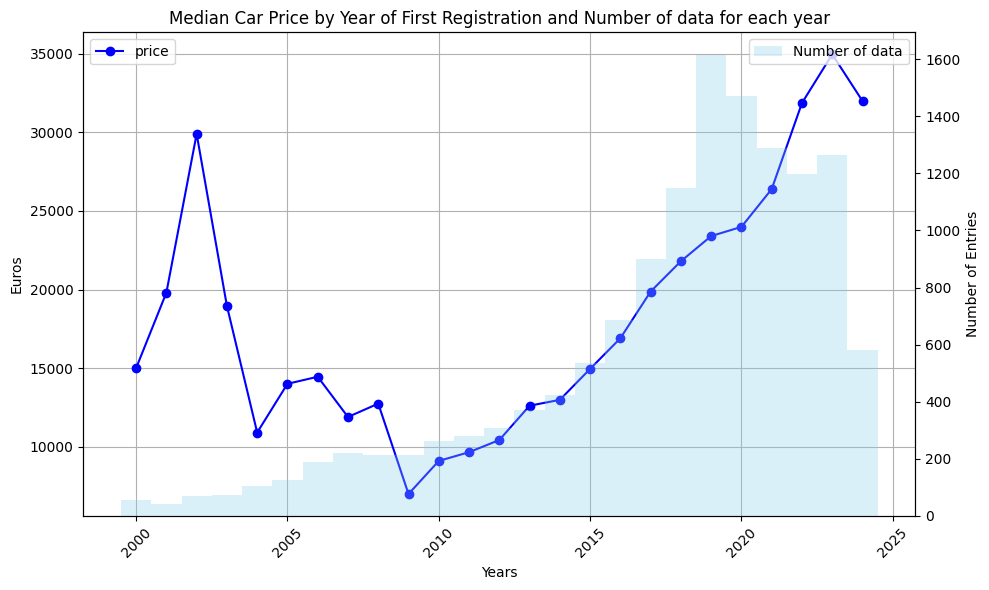

In [77]:
# We see that we have less data until year 2000 (Note that 1900 is the data for unkown date)
# So lets plot in rage of 2000 to today (Note, no more need of threshold)

#only get the year
df_year['year'] = df_year['first_registration'].dt.year


# Filter the data to only include years 2000 and later
df_year = df_year[df_year['year'] >= 2000]

# get the median price by year
med_price_year = df_year.groupby('year')['price'].median()

# Plots
plt.figure(figsize=(10, 6))

#plot line
ax1 = plt.gca()
med_price_year.plot(marker='o', linestyle='-', color='b')  # Line plot with markers
ax1.set_title('Median Car Price by Year of First Registration and Number of data for each year')
ax1.set_xlabel('Years')
ax1.set_ylabel('Euros')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot histo
ax2 = ax1.twinx()  
year_ticks = med_price_year.index   
year_counts = df_year['year'].value_counts().reindex(year_ticks, fill_value=0)  
ax2.bar(year_counts.index, year_counts.values, width=1, alpha=0.3, color='skyblue', label='Number of data')
ax2.set_ylabel('Number of Entries')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Analyse Price by KMs

### Analyse Price by Carburant type

### Analyse Price by body type